In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load in Precipitation Data
df_camel = pd.read_csv('../Data/Prep_Camel_SILO.csv')
df_camel['time'] = pd.to_datetime(df_camel[['year', 'month', 'day']])
df_camel.drop(['day', 'year', 'month'], axis= 1, inplace = True)
df_camel.set_index('time', inplace=True)
df_camel = df_camel['212260']

#Load in Camel Evap Data
df_evap = pd.read_csv('../Data/evap_syn_SILO.csv')
df_evap['time'] = pd.to_datetime(df_evap[['year', 'month', 'day']])
df_evap.drop(['day', 'year', 'month'], axis= 1, inplace = True)
df_evap.set_index('time', inplace=True)
df_evap = df_evap['212260']

df_camel_data = pd.concat([df_camel, df_evap], axis = 1)

df_camel_data.columns = ['P', 'Evap']
df_camel_data.index = df_camel_data.index.date


In [3]:
#Load in Discharge Data
df = pd.read_csv('../Data/5202145_Q_Day.Cmd.txt', sep=';', skiprows= 36, usecols=[0,2], index_col=0, encoding='latin-1', parse_dates=True)
df.rename(columns={' Value': 'Q'}, inplace=True)
df.index = df.index.date
df = pd.merge(df, df_camel_data, left_index=True, right_index=True, how = 'inner')
df.dropna(axis = 0, inplace=True)

df


,Q,P,Evap
1968-05-19,3.009,9.996204,1.175430
1968-05-20,3.104,1.278546,1.269269
1968-05-21,3.425,0.000000,1.193374
1968-05-22,3.934,0.707056,1.236318
1968-05-23,3.246,1.862787,0.983918
...,...,...,...
2018-12-27,0.900,0.000000,9.363467
2018-12-28,0.755,0.096275,9.325681
2018-12-29,0.654,0.349248,9.475430
2018-12-30,0.582,0.000000,9.073066


In [4]:
df['Q'].describe()

count    18489.000000
mean         4.391427
std         16.182932
min          0.000000
25%          0.585000
50%          1.440000
75%          3.689000
max        737.762000
Name: Q, dtype: float64

In [10]:

P_1 = df['P'].mean() * 75000**2 / 1000 # Correcting for units
EP_1 = df['Evap'].mean() * 75000**2 / 1000
Q_1 = df['Q'].mean() * 60 * 24
EPP_1 = (EP_1/P_1)



#Using Bukylo
EA_1 = ((EP_1 /P_1)* np.tanh(1 / (EP_1 /P_1))* (1 - np.exp(-(EP_1 /P_1))))**0.5
#Water Balance
WB_1 = (P_1 - Q_1) /P_1

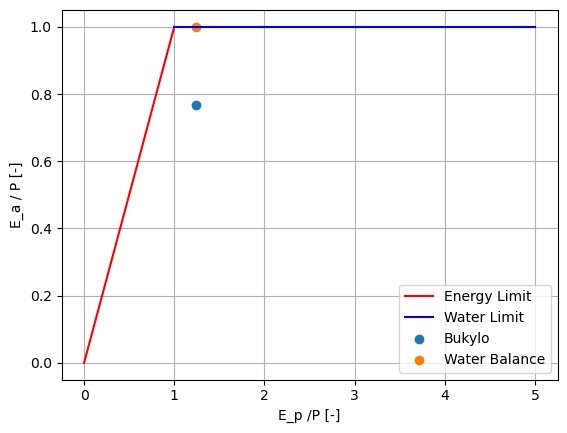

In [11]:
E_p = np.array([0,1])
E_a = np.array([0,1])
E_p2 = np.arange(1, 6)
E_a2 = np.ones(len(E_p2))


plt.plot(E_p, E_a, 'r', label = 'Energy Limit')
plt.plot(E_p2, E_a2, 'b', label = 'Water Limit')
plt.scatter(EPP_1, EA_1, label = 'Bukylo')
plt.scatter(EPP_1, WB_1, label = 'Water Balance')
plt.grid()
plt.xlabel('E_p /P [-]')
plt.ylabel('E_a / P [-]')
plt.legend()

In [7]:
#Losses
L1 = (WB_1 - EA_1) * P_1

#Check
C1 = P_1 - Q_1 - (EA_1*P_1) - L1

C1

0.0

<h3> Question 2 </h3>

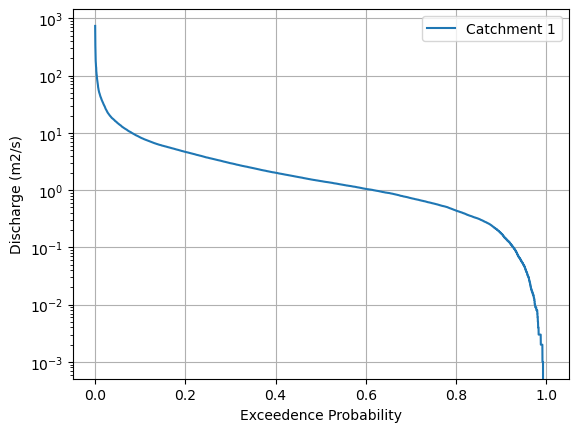

In [8]:
Q1 = df['Q'].sort_values(ascending=False)

rank = np.arange(1, len(Q1)+1, 1)

ex_prob = rank/ (len(Q1)+1)

plt.plot(ex_prob, Q1 ,label = 'Catchment 1')
plt.xlabel('Exceedence Probability')
plt.ylabel('Discharge (m2/s)')
plt.yscale('log')
plt.grid()
#plt.ylim(0, 12)
plt.legend()

<h3> Question 3 </h3>

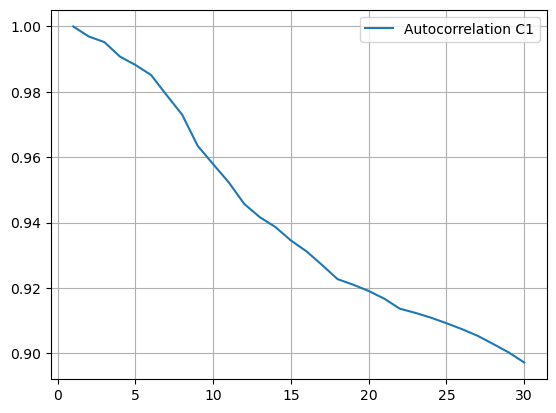

In [9]:
lag = np.arange(1,31)
autocorr_1 = []

for i in range(len(lag)):
    corr_1 = Q1.autocorr(lag = i)
    autocorr_1.append(corr_1)

autocorr_1 = np.array(autocorr_1)

plt.plot(lag, autocorr_1, label = 'Autocorrelation C1')
plt.legend()
plt.grid()


